   Unnamed: 0 trans_date_trans_time        cc_num  \
0           0      01-01-2019 00:00  2.700000e+15   
1           1      01-01-2019 00:00  6.300000e+11   
2           2      01-01-2019 00:00  3.890000e+13   
3           3      01-01-2019 00:01  3.530000e+15   
4           4      01-01-2019 00:03  3.760000e+14   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sa

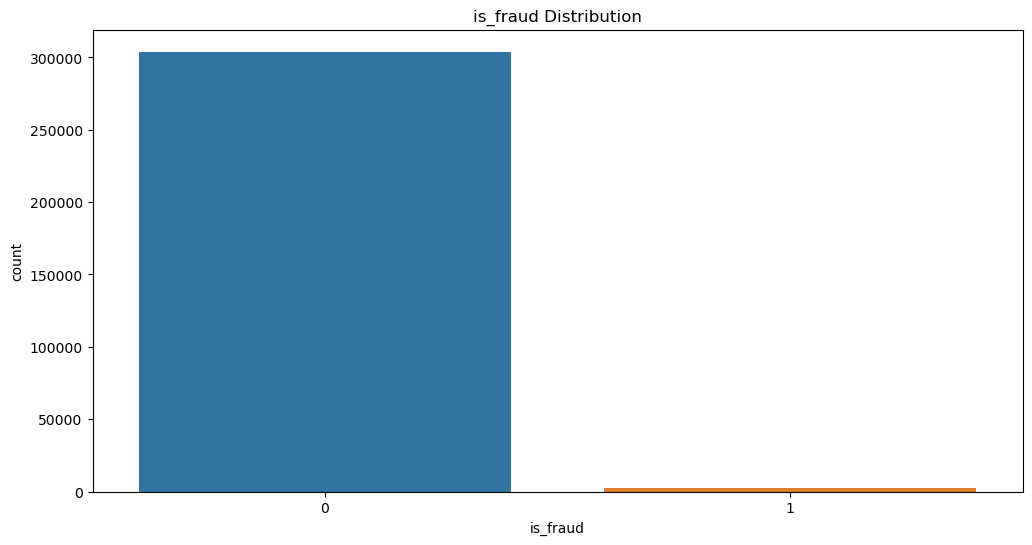

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('C:\\Users\\acer\\Documents\\study\\Credit_card_transactions.csv')

print(df.head())
print(df.describe())

print(df['is_fraud'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('is_fraud Distribution')
plt.show()

# Convert transaction date to datetime format with day-first specification
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True)
# Convert transaction date to datetime format and extract features
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['day_of_month'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month


# One-hot encode categorical columns (if limited unique values)
df = pd.get_dummies(df, columns=['gender', 'state'], drop_first=True)

# Use ordinal encoding or embeddings for high-cardinality columns
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[['merchant', 'category', 'job']] = encoder.fit_transform(df[['merchant', 'category', 'job']])


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['amt', 'lat', 'long', 'city_pop']] = scaler.fit_transform(df[['amt', 'lat', 'long', 'city_pop']])


# Example: Daily aggregation
df.set_index('trans_date_trans_time', inplace=True)
daily_data = df.resample('D').agg({'amt': 'sum', 'category': 'count'})
daily_data.rename(columns={'amt': 'total_amt', 'category': 'transaction_count'}, inplace=True)




In [44]:
from sklearn.ensemble import IsolationForest

# Initialize and train Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = isolation_forest.fit_predict(df[['amt', 'lat', 'long', 'city_pop']])



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Define model
timesteps = 10  # Based on desired sequence length
input_dim = data.shape[1]  # Number of features

model = Sequential([
    LSTM(128, input_shape=(timesteps, input_dim), return_sequences=True),
    LSTM(64, return_sequences=False),
    RepeatVector(timesteps),
    LSTM(64, return_sequences=True),
    LSTM(128, return_sequences=True),
    TimeDistributed(Dense(input_dim))
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
history = model.fit(train_data, train_data, epochs=20, batch_size=32, validation_split=0.2)

ModuleNotFoundError: No module named 'tensorflow'